### IMPORTING PACKAGES

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')


#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec #Word2Vec is mostly used for huge datasets

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
pd.set_option('display.max_colwidth', None)

## Loading Data

In [3]:
#you can download the data from https://www.kaggle.com/c/nlp-getting-started/data
import os
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/ML1010/Dataset/IMDB Dataset.csv')
print(df.shape)
df.head()

(50000, 2)


,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

Split dataset into Train and Test Sets and make sentiments 1 and 0

In [5]:
X = df['review']
y = df['sentiment']
y = y.map({'positive': 1, 'negative': 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
X.head(10)

,review
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side."
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done."
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends."
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when

# EDA before Preprocessing

In [7]:
# Recombine X_train and y_train into a single DataFrame
df_train = pd.DataFrame({'review': X_train, 'sentiment': y_train}).reset_index(drop=True)
df_train.head()

,review,sentiment
0,"As much as I love trains, I couldn't stomach this movie. The premise that one could steal a locomotive and ""drive"" from Arkansas to Chicago without hitting another train along the way has to be right up there on the Impossible Plot lines hit board. Imagine two disgruntled NASA employees stealing the ""crawler"" that totes the shuttles to and fro and driving it to New York and you get the idea.<br /><br />Having said all that, it's a nice try. Wilford Brimely is at his Quaker Oats best, and Levon Helm turns a good performance as his dimwitted but well-meaning sidekick. Bob Balaban is suitably wormy as the Corporate Guy, and the ""little guy takes on Goliath"" story gets another airing.",0
1,"This was a very good PPV, but like Wrestlemania XX some 14 years later, the WWE crammed so many matches on it, some of the matches were useless. I'm not going to go through every match on the card because it would take forever to do.<br /><br />However major highlights included the HUGE pop for Demolition winning the tag team belts from Haku and Andre the Giant, The first ever mixed tag match featuring Randy Savage and Sensational Queen Sherri vs Dusty Rhodes and the late Sapphire and the first ever clash between The Ultimate Warrior and Hulk Hogan.<br /><br />Some matches were a complete waste of time. Like The Bolsheviks vs The Hart Foundation was only about 40 seconds long, Koko B Ware vs Rick Martel was short and Big Bossman vs Akeem was too short.<br /><br />Mr Perfect vs Brutus Beefcake and Ted DiBiase vs Jake 'the snake' Roberts were very good indeed.<br /><br />Overall Grade - B",1
2,"Not finding the right words is everybody's problem in this vaudeville-type urban comedy. They don't know what to say, and they don't know how to say it, which is why they embark on the potentially humiliating enterprise of pre-arranged speed dating. Unfortunately, they all come across as cardboard characters rather than real people. The story follows a conventional three-act structure: getting to know the sizable cast in their sorry single lives, the actual dating circuit, and a final stretch of romantic fallout, showcasing some of the new-found couples' follies. Because it's all so predictable, I'd say that as a narrative, ""Shoppen"" is a failure. As a comedy, most of the time it's too goofy to be really funny. Thumbs up to Kathrin von Steinburg. She stands out from the soap opera crowd as the aloof, independently wealthy Miriam. Great makeup on her too (Verena Weißert): Heavy eye shadow meets skin-tone lip gloss, creating a brooding and bohemian, yet girlish effect. Thumbs up also to Stefan Zinner as the Bavarian love machine and Tanja Schleiff as the hot nutritionist. They bypass the communication challenge by way of the timeless body language of copulation.",0
3,"I'm really suprised this movie didn't get a higher rating on IMDB. It's one of those movies that could easily get by someone, but for romantic comedy ""Moonstruck"" is really in a class by itself. It's setting and ethnic charm are things people seem to take for granted. The casting alone makes it a nearly perfect movie. Few movies in the 1980's were as good as ""Moonstruck""and it's funny too. **** out of *****",1
4,"I'll start by confessing that I tend to really enjoy action movies (military or other). I'm a guy. But this dreck was awful. I saw it for free, showtime or hbo and still feel I paid too much. It was a prolonged episode of general hospital. <br /><br />I gave it a 1, only because 0 or 0.1 was not possible. How or why 59 others would give it a rating of between 5 and 6 boggles my mind. Unless they are all family of the cast or crew. <br /><br />It might be, this movie was so bad many bailed out.......and as such, were too uninvested to bother.<br /><br />I'm sorry for repeating but the 10 line minimum seems silly, for what essentially boils down to a warning.........in hopes of saving others the 2 hr black hole, this movie represents. Trust me, stare at a

sentiment
0    17589
1    17411
Name: count, dtype: int64


<Axes: xlabel='sentiment'>

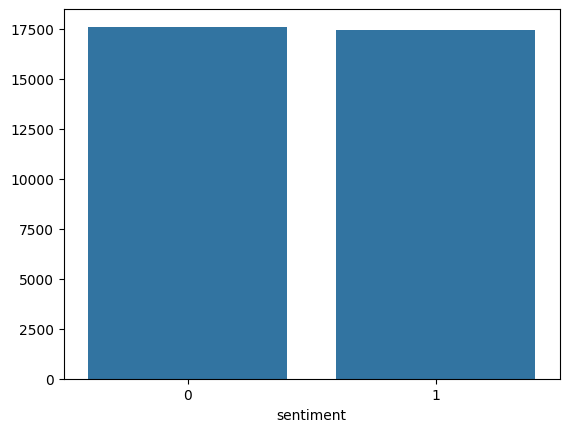

In [8]:
# CLASS DISTRIBUTION
#if dataset is balanced or not
x=df_train['sentiment'].value_counts()
print(x)
sns.barplot(x=x.index, y=x.values)

In [9]:
#Missing values
df_train.isna().sum()

,0
review,0
sentiment,0


In [10]:
#1. WORD-COUNT
df_train['word_count'] = df_train['review'].apply(lambda x: len(str(x).split()))
print(f"Positive average words: {df_train[df_train['sentiment']==1]['word_count'].mean()}") #Positive Reviews
print(f"Negative average words: {df_train[df_train['sentiment']==0]['word_count'].mean()}") #Negative Reviews
#Approx the same in length

#2. CHARACTER-COUNT
df_train['char_count'] = df_train['review'].apply(lambda x: len(str(x)))
print(f"Positive average chars: {df_train[df_train['sentiment']==1]['char_count'].mean()}") #Positive Reviews
print(f"Negative average chars: {df_train[df_train['sentiment']==0]['char_count'].mean()}") #Negative Reviews
#Positive have more chars

#3. UNIQUE WORD-COUNT
df_train['unique_word_count'] = df_train['review'].apply(lambda x: len(set(str(x).split())))
print(f"Positive unique words: {df_train[df_train['sentiment']==1]['unique_word_count'].mean()}") #Postive
print(f"Negative unique words: {df_train[df_train['sentiment']==0]['unique_word_count'].mean()}") #Negative

Positive average words: 232.63626443053244
Negative average words: 229.01358803797828
Positive average chars: 1323.1717305151915
Negative average chars: 1291.479959065325
Positive unique words: 151.7216702084889
Negative unique words: 152.0018761726079


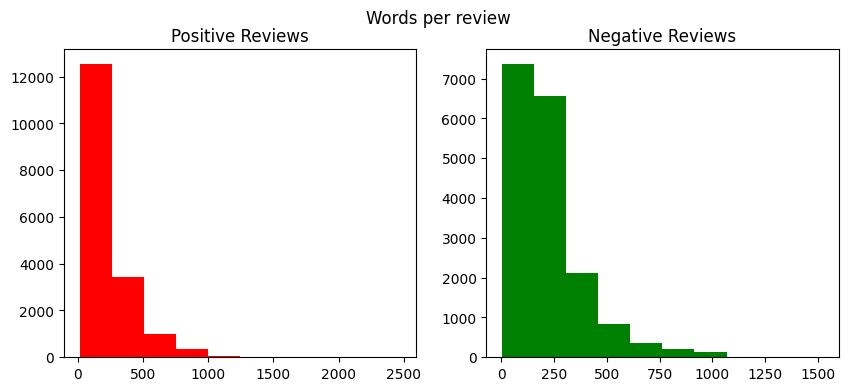

In [11]:
#Plotting word-count per tweet
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=df_train[df_train['sentiment']==1]['word_count']
ax1.hist(train_words,color='red')
ax1.set_title('Positive Reviews')
train_words=df_train[df_train['sentiment']==0]['word_count']
ax2.hist(train_words,color='green')
ax2.set_title('Negative Reviews')
fig.suptitle('Words per review')
plt.show()

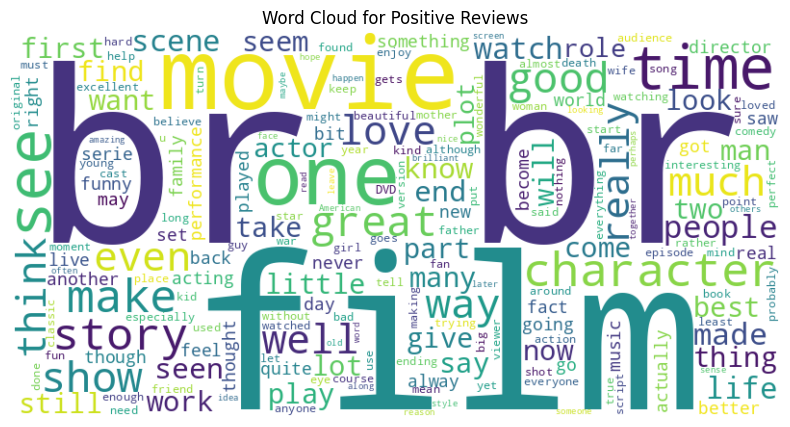

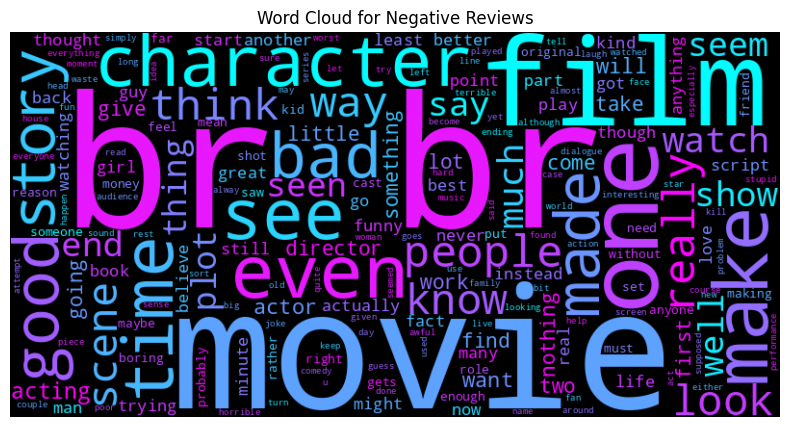

In [12]:
from wordcloud import WordCloud

# Generate word clouds for each sentiment
positive_reviews = " ".join(df_train[df_train['sentiment'] == 1]['review'])
negative_reviews = " ".join(df_train[df_train['sentiment'] == 0]['review'])

# Positive WordCloud
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

# Negative WordCloud
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='cool').generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

<ipython-input-13-cb1d46369fea>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=positive_df, ax=axes[0], palette='Blues_r', order=positive_df['Word'])
<ipython-input-13-cb1d46369fea>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=negative_df, ax=axes[1], palette='Reds_r', order=negative_df['Word'])


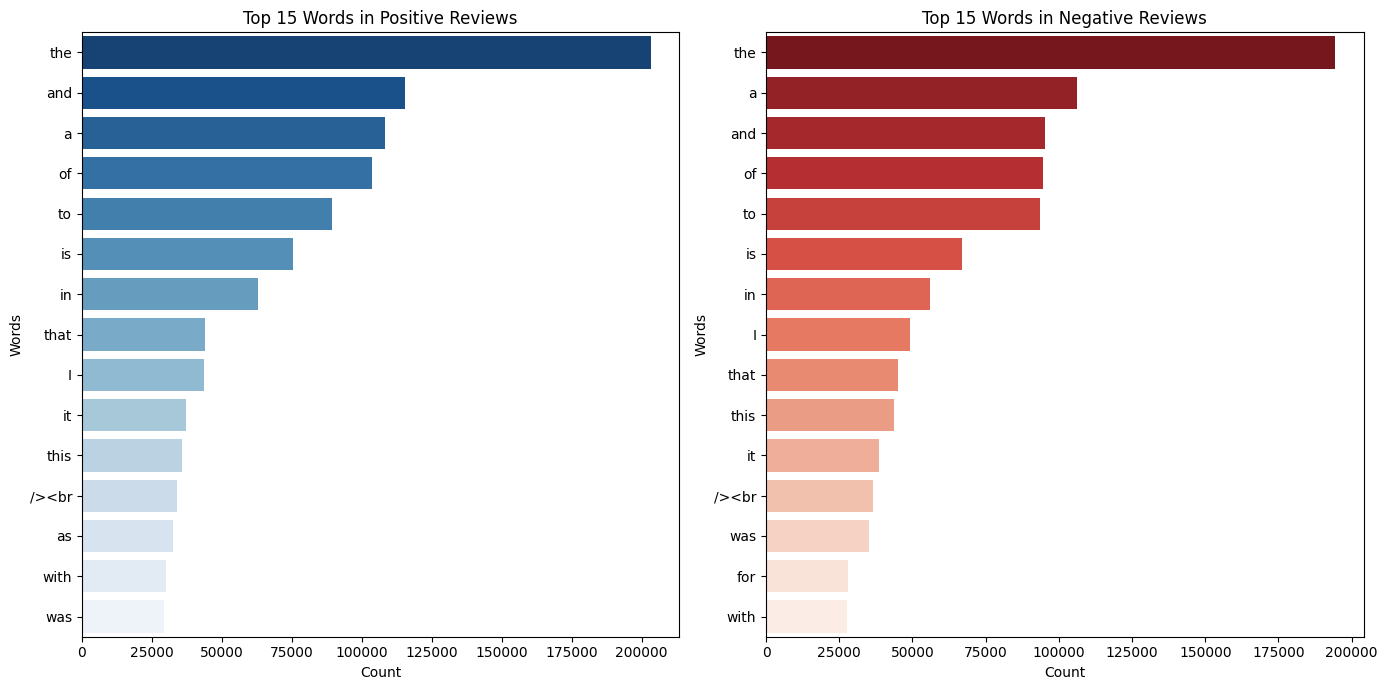

In [13]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tokenize and find most common words
positive_words = [word for review in df_train[df_train['sentiment'] == 1]['review'] for word in review.split()]
negative_words = [word for review in df_train[df_train['sentiment'] == 0]['review'] for word in review.split()]

positive_counts = Counter(positive_words).most_common(15)
negative_counts = Counter(negative_words).most_common(15)

# Convert to DataFrame for Visualization
positive_df = pd.DataFrame(positive_counts, columns=['Word', 'Count']).sort_values(by='Count', ascending=False)
negative_df = pd.DataFrame(negative_counts, columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharey=False)

# Plot positive words in descending order
sns.barplot(x='Count', y='Word', data=positive_df, ax=axes[0], palette='Blues_r', order=positive_df['Word'])
axes[0].set_title('Top 15 Words in Positive Reviews')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Words')  # Y-axis label for the left plot

# Plot negative words in descending order
sns.barplot(x='Count', y='Word', data=negative_df, ax=axes[1], palette='Reds_r', order=negative_df['Word'])
axes[1].set_title('Top 15 Words in Negative Reviews')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Words')  # Y-axis label for the right plot

plt.tight_layout()
plt.show()

## PRE-PROCESSING

In [14]:
#1. Common text preprocessing
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  adjacent spaces and tabs     .  "

#convert to lowercase and remove punctuations and characters and then strip
import re
import string

def preprocess(text):
    # Convert to lowercase
    text = text.lower()

    # Remove leading and trailing whitespace
    text = text.strip()

    # Remove HTML tags
    text = re.compile('<.*?>').sub('', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+', ' ', text)

    # Replace punctuation with space (be cautious as punctuation can sometimes be useful)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)

    # Remove extra spaces and tabs
    text = re.sub('\s+', ' ', text)

    # Remove citations, such as [1], [2], etc.
    text = re.sub(r'\[[0-9]*\]', ' ', text)

    # Remove any non-alphanumeric characters except whitespace (e.g., !, #, @)
    text = re.sub(r'[^\w\s]', '', text)

    # Remove digits
    text = re.sub(r'\d', ' ', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)

    # Handle slang/commonly used abbreviations (can be extended as needed)
    text = re.sub(r"(?i)\b(u|ur|you)\b", "you", text)  # Replace 'u', 'ur' with 'you'
    text = re.sub(r"(?i)\b(r|rly)\b", "really", text)  # Replace 'r', 'rly' with 'really'
    text = re.sub(r"(?i)\b(lol|rofl|lmao)\b", "laughing", text)  # Replace common internet acronyms
    text = re.sub(r"(?i)\b(bff|bestie)\b", "best friend", text)  # Replace 'bff', 'bestie' with 'best friend'
    text = re.sub(r"(?i)\b(wtf|omg|wtv)\b", "expression", text)  # Replace 'wtf', 'omg', 'wtv' with 'expression'

    # Handle contractions (can be expanded as needed)
    text = re.sub(r"(?i)\b(i'm|i've|i'd|i'll|i'ma|you're|you've|you'd|you'll|they're|they've|they'd|they'll)\b", 'i am', text)

    # Replace multiple consecutive vowels (common in slang)
    text = re.sub(r"([aeiou])\1{2,}", r"\1", text)  # Remove repeated vowels, e.g., "sooo" -> "so"

    # Remove emojis (if necessary)
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Remove any non-ASCII characters (including emojis)

    return text

text=preprocess(text)
print(text)  #text is a string

this is a message to be cleaned it may involve some things like adjacent spaces and tabs 


In [15]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [16]:
#3. LEXICON-BASED TEXT PROCESSING EXAMPLES

#1. STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

text=stopword(text)
print(text)

#2. STEMMING

# Initialize the stemmer
snow = SnowballStemmer('english')
def stemming(string):
    a=[snow.stem(i) for i in word_tokenize(string) ]
    return " ".join(a)
text=stemming(text)
print(text)

#3. LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()

# This is a helper function to map NTLK position tags
# Full list is available here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

text = lemmatizer(text)
print(text)

message cleaned may involve things like adjacent spaces tabs
messag clean may involv thing like adjac space tab
messag clean may involv thing like adjac space tab


In [17]:
#FINAL PREPROCESSING
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

df_train['clean_review'] = df_train['review'].apply(lambda x: finalpreprocess(x))
df_train=df_train.drop(columns=['word_count','char_count','unique_word_count'])
df_train.head()

,review,sentiment,clean_review
0,"As much as I love trains, I couldn't stomach this movie. The premise that one could steal a locomotive and ""drive"" from Arkansas to Chicago without hitting another train along the way has to be right up there on the Impossible Plot lines hit board. Imagine two disgruntled NASA employees stealing the ""crawler"" that totes the shuttles to and fro and driving it to New York and you get the idea.<br /><br />Having said all that, it's a nice try. Wilford Brimely is at his Quaker Oats best, and Levon Helm turns a good performance as his dimwitted but well-meaning sidekick. Bob Balaban is suitably wormy as the Corporate Guy, and the ""little guy takes on Goliath"" story gets another airing.",0,much love train stomach movie premise one could steal locomotive drive arkansas chicago without hit another train along way right impossible plot line hit board imagine two disgruntle nasa employee steal crawler tote shuttle fro drive new york get idea say nice try wilford brimely quaker oat best levon helm turn good performance dimwitted well mean sidekick bob balaban suitably wormy corporate guy little guy take goliath story get another airing
1,"This was a very good PPV, but like Wrestlemania XX some 14 years later, the WWE crammed so many matches on it, some of the matches were useless. I'm not going to go through every match on the card because it would take forever to do.<br /><br />However major highlights included the HUGE pop for Demolition winning the tag team belts from Haku and Andre the Giant, The first ever mixed tag match featuring Randy Savage and Sensational Queen Sherri vs Dusty Rhodes and the late Sapphire and the first ever clash between The Ultimate Warrior and Hulk Hogan.<br /><br />Some matches were a complete waste of time. Like The Bolsheviks vs The Hart Foundation was only about 40 seconds long, Koko B Ware vs Rick Martel was short and Big Bossman vs Akeem was too short.<br /><br />Mr Perfect vs Brutus Beefcake and Ted DiBiase vs Jake 'the snake' Roberts were very good indeed.<br /><br />Overall Grade - B",1,good ppv like wrestlemania xx year later wwe cram many match match useless go go every match card would take forever however major highlight include huge pop demolition win tag team belt haku andre giant first ever mixed tag match feature randy savage sensational queen sherri v dusty rhodes late sapphire first ever clash ultimate warrior hulk hogan match complete waste time like bolshevik vs hart foundation second long koko b ware v rick martel short big bossman v akeem short mr perfect v brutus beefcake ted dibiase v jake snake robert good indeed overall grade b
2,"Not finding the right words is everybody's problem in this vaudeville-type urban comedy. They don't know what to say, and they don't know how to say it, which is why they embark on the potentially humiliating enterprise of pre-arranged speed dating. Unfortunately, they all come across as cardboard characters rather than real people. The story follows a conventional three-act structure: getting to know the sizable cast in their sorry single lives, the actual dating circuit, and a final stretch of romantic fallout, showcasing some of the new-found couples' follies. Because it's all so predictable, I'd say that as a narrative, ""Shoppen"" is a failure. As a comedy, most of the time it's too goofy to be really funny. Thumbs up to Kathrin von Steinburg. She stands out from the soap opera crowd as the aloof, independently wealthy Miriam. Great makeup on her too (Verena Weißert): Heavy eye shadow meets skin-tone lip gloss, creating a brooding and bohemian, yet girlish effect. Thumbs up also to Stefan Zinner as the Bavarian love machine and Tanja Schleiff as the hot nutritionist. They bypass the communication challenge by way of the timeless body language of copulation.",0,find right word everybody problem vaudeville type urban comedy know say know say embark potentially humiliate enterprise pre arrange speed date unfortunat

#Visualization after Preprocessing

In [18]:
#1. WORD-COUNT
df_train['word_count'] = df_train['clean_review'].apply(lambda x: len(str(x).split()))
print(f"Positive average words: {df_train[df_train['sentiment']==1]['word_count'].mean()}") #Positive Reviews
print(f"Negative average words: {df_train[df_train['sentiment']==0]['word_count'].mean()}") #Negative Reviews
#Approx the same in length

#2. CHARACTER-COUNT
df_train['char_count'] = df_train['clean_review'].apply(lambda x: len(str(x)))
print(f"Positive average chars: {df_train[df_train['sentiment']==1]['char_count'].mean()}") #Positive Reviews
print(f"Negative average chars: {df_train[df_train['sentiment']==0]['char_count'].mean()}") #Negative Reviews
#Positive have more chars

#3. UNIQUE WORD-COUNT
df_train['unique_word_count'] = df_train['clean_review'].apply(lambda x: len(set(str(x).split())))
print(f"Positive unique words: {df_train[df_train['sentiment']==1]['unique_word_count'].mean()}") #Postive
print(f"Negative unique words: {df_train[df_train['sentiment']==0]['unique_word_count'].mean()}") #Negative

Positive average words: 119.70535868129343
Negative average words: 116.12911478765137
Positive average chars: 792.8965596462007
Negative average chars: 755.6506339189266
Positive unique words: 94.10395726839354
Negative unique words: 92.1143328216499


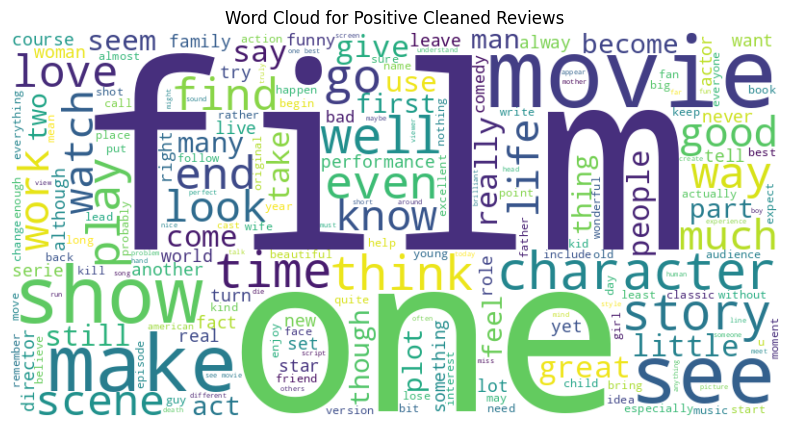

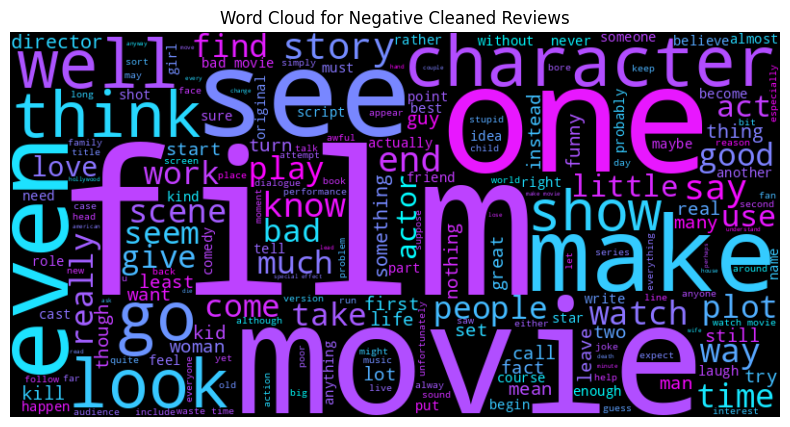

In [19]:
# Generate word clouds for each sentiment
positive_reviews = " ".join(df_train[df_train['sentiment'] == 1]['clean_review'])
negative_reviews = " ".join(df_train[df_train['sentiment'] == 0]['clean_review'])

# Positive WordCloud
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Cleaned Reviews')
plt.axis('off')
plt.show()

# Negative WordCloud
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='cool').generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Cleaned Reviews')
plt.axis('off')
plt.show()

<ipython-input-20-2b108f2bd2e8>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=positive_df, ax=axes[0], palette='Blues_r', order=positive_df['Word'])
<ipython-input-20-2b108f2bd2e8>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=negative_df, ax=axes[1], palette='Reds_r', order=negative_df['Word'])


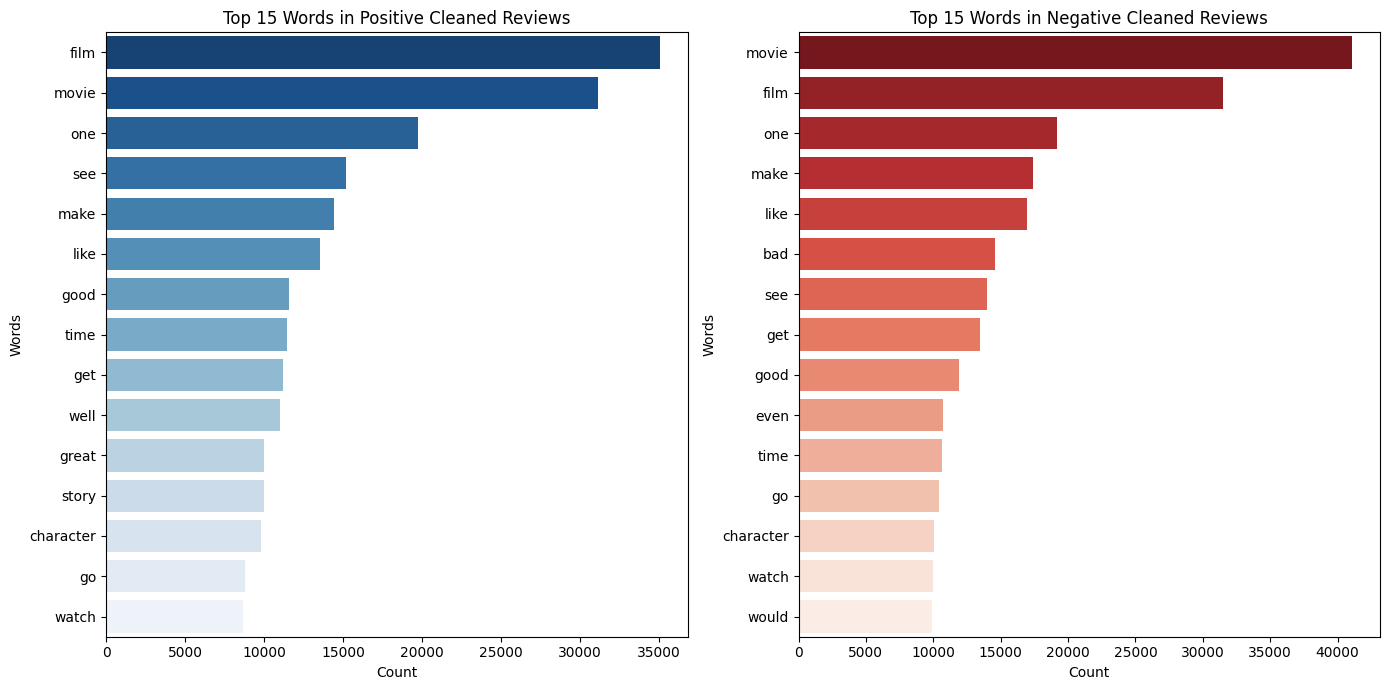

In [20]:
# Tokenize and find most common words
positive_words = [word for review in df_train[df_train['sentiment'] == 1]['clean_review'] for word in review.split()]
negative_words = [word for review in df_train[df_train['sentiment'] == 0]['clean_review'] for word in review.split()]

positive_counts = Counter(positive_words).most_common(15)
negative_counts = Counter(negative_words).most_common(15)

# Convert to DataFrame for Visualization
positive_df = pd.DataFrame(positive_counts, columns=['Word', 'Count']).sort_values(by='Count', ascending=False)
negative_df = pd.DataFrame(negative_counts, columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharey=False)

# Plot positive words in descending order
sns.barplot(x='Count', y='Word', data=positive_df, ax=axes[0], palette='Blues_r', order=positive_df['Word'])
axes[0].set_title('Top 15 Words in Positive Cleaned Reviews')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Words')  # Y-axis label for the left plot

# Plot negative words in descending order
sns.barplot(x='Count', y='Word', data=negative_df, ax=axes[1], palette='Reds_r', order=negative_df['Word'])
axes[1].set_title('Top 15 Words in Negative Cleaned Reviews')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Words')  # Y-axis label for the right plot

plt.tight_layout()
plt.show()

In [23]:
df_train.head()

,review,sentiment,clean_review,word_count,char_count,unique_word_count
0,"As much as I love trains, I couldn't stomach this movie. The premise that one could steal a locomotive and ""drive"" from Arkansas to Chicago without hitting another train along the way has to be right up there on the Impossible Plot lines hit board. Imagine two disgruntled NASA employees stealing the ""crawler"" that totes the shuttles to and fro and driving it to New York and you get the idea.<br /><br />Having said all that, it's a nice try. Wilford Brimely is at his Quaker Oats best, and Levon Helm turns a good performance as his dimwitted but well-meaning sidekick. Bob Balaban is suitably wormy as the Corporate Guy, and the ""little guy takes on Goliath"" story gets another airing.",0,much love train stomach movie premise one could steal locomotive drive arkansas chicago without hit another train along way right impossible plot line hit board imagine two disgruntle nasa employee steal crawler tote shuttle fro drive new york get idea say nice try wilford brimely quaker oat best levon helm turn good performance dimwitted well mean sidekick bob balaban suitably wormy corporate guy little guy take goliath story get another airing,71,449,64
1,"This was a very good PPV, but like Wrestlemania XX some 14 years later, the WWE crammed so many matches on it, some of the matches were useless. I'm not going to go through every match on the card because it would take forever to do.<br /><br />However major highlights included the HUGE pop for Demolition winning the tag team belts from Haku and Andre the Giant, The first ever mixed tag match featuring Randy Savage and Sensational Queen Sherri vs Dusty Rhodes and the late Sapphire and the first ever clash between The Ultimate Warrior and Hulk Hogan.<br /><br />Some matches were a complete waste of time. Like The Bolsheviks vs The Hart Foundation was only about 40 seconds long, Koko B Ware vs Rick Martel was short and Big Bossman vs Akeem was too short.<br /><br />Mr Perfect vs Brutus Beefcake and Ted DiBiase vs Jake 'the snake' Roberts were very good indeed.<br /><br />Overall Grade - B",1,good ppv like wrestlemania xx year later wwe cram many match match useless go go every match card would take forever however major highlight include huge pop demolition win tag team belt haku andre giant first ever mixed tag match feature randy savage sensational queen sherri v dusty rhodes late sapphire first ever clash ultimate warrior hulk hogan match complete waste time like bolshevik vs hart foundation second long koko b ware v rick martel short big bossman v akeem short mr perfect v brutus beefcake ted dibiase v jake snake robert good indeed overall grade b,97,569,81
2,"Not finding the right words is everybody's problem in this vaudeville-type urban comedy. They don't know what to say, and they don't know how to say it, which is why they embark on the potentially humiliating enterprise of pre-arranged speed dating. Unfortunately, they all come across as cardboard characters rather than real people. The story follows a conventional three-act structure: getting to know the sizable cast in their sorry single lives, the actual dating circuit, and a final stretch of romantic fallout, showcasing some of the new-found couples' follies. Because it's all so predictable, I'd say that as a narrative, ""Shoppen"" is a failure. As a comedy, most of the time it's too goofy to be really funny. Thumbs up to Kathrin von Steinburg. She stands out from the soap opera crowd as the aloof, independently wealthy Miriam. Great makeup on her too (Verena Weißert): Heavy eye shadow meets skin-tone lip gloss, creating a brooding and bohemian, yet girlish effect. Thumbs up also to Stefan Zinner as the Bavarian love machine and Tanja Schleiff as the hot nutritionist. They bypass the communication challenge by way of the timeless body language of copulation.",0,find right word everybody problem vaudeville type urban comedy know say know say embark potent

#Tokenization for BERT

In [22]:
!pip install transformers --quiet

In [24]:
import pandas as pd
from transformers import BertTokenizer

# Load your DataFrame (assuming df_train is already loaded)
# Example: df_train = pd.read_csv('your_train_data.csv')

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenizing the 'text' column
def tokenize_text(text):
    # Tokenizing with padding and truncation to ensure uniform sequence length
    encoding = tokenizer(text, padding=True, truncation=True, return_tensors='pt', max_length=512)
    return encoding['input_ids'], encoding['attention_mask']

# Apply tokenization to the 'text' column
df_train['input_ids'], df_train['attention_mask'] = zip(*df_train['clean_review'].apply(tokenize_text))

# Inspect the result
print(df_train[['clean_review', 'input_ids', 'attention_mask']].head())


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  clean_review  \
0                                                                                                                                                                                                     

In [25]:
df_train.head()

,review,sentiment,clean_review,word_count,char_count,unique_word_count,input_ids,attention_mask
0,"As much as I love trains, I couldn't stomach this movie. The premise that one could steal a locomotive and ""drive"" from Arkansas to Chicago without hitting another train along the way has to be right up there on the Impossible Plot lines hit board. Imagine two disgruntled NASA employees stealing the ""crawler"" that totes the shuttles to and fro and driving it to New York and you get the idea.<br /><br />Having said all that, it's a nice try. Wilford Brimely is at his Quaker Oats best, and Levon Helm turns a good performance as his dimwitted but well-meaning sidekick. Bob Balaban is suitably wormy as the Corporate Guy, and the ""little guy takes on Goliath"" story gets another airing.",0,much love train stomach movie premise one could steal locomotive drive arkansas chicago without hit another train along way right impossible plot line hit board imagine two disgruntle nasa employee steal crawler tote shuttle fro drive new york get idea say nice try wilford brimely quaker oat best levon helm turn good performance dimwitted well mean sidekick bob balaban suitably wormy corporate guy little guy take goliath story get another airing,71,449,64,"[[tensor(101), tensor(2172), tensor(2293), tensor(3345), tensor(4308), tensor(3185), tensor(18458), tensor(2028), tensor(2071), tensor(8954), tensor(8098), tensor(3298), tensor(6751), tensor(3190), tensor(2302), tensor(2718), tensor(2178), tensor(3345), tensor(2247), tensor(2126), tensor(2157), tensor(5263), tensor(5436), tensor(2240), tensor(2718), tensor(2604), tensor(5674), tensor(2048), tensor(4487), tensor(28745), tensor(15532), tensor(9286), tensor(9274), tensor(7904), tensor(8954), tensor(13529), tensor(2121), tensor(2000), tensor(2618), tensor(10382), tensor(10424), tensor(2080), tensor(3298), tensor(2047), tensor(2259), tensor(2131), tensor(2801), tensor(2360), tensor(3835), tensor(3046), tensor(19863), tensor(3877), tensor(7987), tensor(14428), tensor(2135), tensor(18844), tensor(1051), tensor(4017), tensor(2190), tensor(23310), tensor(2239), tensor(16254), tensor(2735), tensor(2204), tensor(2836), tensor(11737), tensor(9148), tensor(16190), tensor(2092), tensor(2812), tensor(29240), tensor(3960), tensor(21451), tensor(8193), tensor(4848), tensor(8231), tensor(15485), tensor(2100), tensor(5971), tensor(3124), tensor(2210), tensor(3124), tensor(2202), tensor(2175), tensor(6632), tensor(2705), tensor(2466), tensor(2131), tensor(2178), tensor(10499), tensor(102)]]","[[tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]]"
1,"This was a very good PPV, but like Wrestlemania XX some 14 years later, the WWE crammed so many matches on it, some of the matches were useless. I'm not going to go through every match on the card because it would take forever to do.<br /><br />However major highlights included the HUGE pop for Demolition winning the tag team belts from Haku and Andre the Giant, The first ever mixed tag match featuring Randy Savage and Sensational Quee

In [26]:
# Create a new DataFrame with only 'clean_review', 'sentiment', and token information
tokenized_train_df = df_train[['clean_review', 'sentiment', 'input_ids', 'attention_mask']]
cleaned_train_df = df_train[['clean_review', 'sentiment']]

# Save the new DataFrame to a CSV file
tokenized_train_df.to_csv('tokenized_train_df.csv', index=False)
cleaned_train_df.to_csv('cleaned_train_df.csv', index=False)

# Print the first few rows of the cleaned DataFrame to confirm
tokenized_train_df.head()

,clean_review,sentiment,input_ids,attention_mask
0,much love train stomach movie premise one could steal locomotive drive arkansas chicago without hit another train along way right impossible plot line hit board imagine two disgruntle nasa employee steal crawler tote shuttle fro drive new york get idea say nice try wilford brimely quaker oat best levon helm turn good performance dimwitted well mean sidekick bob balaban suitably wormy corporate guy little guy take goliath story get another airing,0,"[[tensor(101), tensor(2172), tensor(2293), tensor(3345), tensor(4308), tensor(3185), tensor(18458), tensor(2028), tensor(2071), tensor(8954), tensor(8098), tensor(3298), tensor(6751), tensor(3190), tensor(2302), tensor(2718), tensor(2178), tensor(3345), tensor(2247), tensor(2126), tensor(2157), tensor(5263), tensor(5436), tensor(2240), tensor(2718), tensor(2604), tensor(5674), tensor(2048), tensor(4487), tensor(28745), tensor(15532), tensor(9286), tensor(9274), tensor(7904), tensor(8954), tensor(13529), tensor(2121), tensor(2000), tensor(2618), tensor(10382), tensor(10424), tensor(2080), tensor(3298), tensor(2047), tensor(2259), tensor(2131), tensor(2801), tensor(2360), tensor(3835), tensor(3046), tensor(19863), tensor(3877), tensor(7987), tensor(14428), tensor(2135), tensor(18844), tensor(1051), tensor(4017), tensor(2190), tensor(23310), tensor(2239), tensor(16254), tensor(2735), tensor(2204), tensor(2836), tensor(11737), tensor(9148), tensor(16190), tensor(2092), tensor(2812), tensor(29240), tensor(3960), tensor(21451), tensor(8193), tensor(4848), tensor(8231), tensor(15485), tensor(2100), tensor(5971), tensor(3124), tensor(2210), tensor(3124), tensor(2202), tensor(2175), tensor(6632), tensor(2705), tensor(2466), tensor(2131), tensor(2178), tensor(10499), tensor(102)]]","[[tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]]"
1,good ppv like wrestlemania xx year later wwe cram many match match useless go go every match card would take forever however major highlight include huge pop demolition win tag team belt haku andre giant first ever mixed tag match feature randy savage sensational queen sherri v dusty rhodes late sapphire first ever clash ultimate warrior hulk hogan match complete waste time like bolshevik vs hart foundation second long koko b ware v rick martel short big bossman v akeem short mr perfect v brutus beefcake ted dibiase v jake snake robert good indeed overall grade b,1,"[[tensor(101), tensor(2204), tensor(4903), tensor(2615), tensor(2066), tensor(28063), tensor(22038), tensor(2095), tensor(2101), tensor(11700), tensor(13675), tensor(3286), tensor(2116), tensor(2674), tensor(2674), tensor(11809), tensor(2175), tensor(2175), tensor(2296), tensor(2674), tensor(4003), tensor(2052), tensor(2202), tensor(5091), tensor(2174), tensor(2350), tensor(12944), tensor(2421), tensor(4121), tensor(3769), tensor(12451), tensor(2663), tensor(6415), tensor(2136), tensor(5583), tensor(5292), tensor(5283), tensor(7213), tensor(5016), tensor(2034), tensor(2412), tensor(3816), tensor(6415), tensor(2674)